In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Import Data
Input Data Penjualan Indihome

In [53]:
data = pd.read_excel('/content/data penjualan indihome.xlsx')
data.head()

,tanggal,sales
0,2018-01-01,543
1,2018-02-01,456
2,2018-03-01,525
3,2018-04-01,597
4,2018-05-01,673


`cek nilai hilang`

In [54]:
data.isnull().sum()

tanggal    0
sales      0
dtype: int64

NB : *tidak terdapat nilai hilang dalam data*

# Analisis Data

`melihat pola data terhadap waktu`

NB : *data yang dipakai adalah data bulanan*

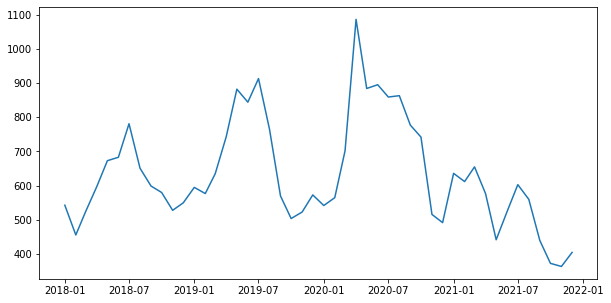

In [55]:
plt.figure(figsize=(10,5))
plt.plot(data['tanggal'],data['sales'])

`Check Trend dan Siklus Data`

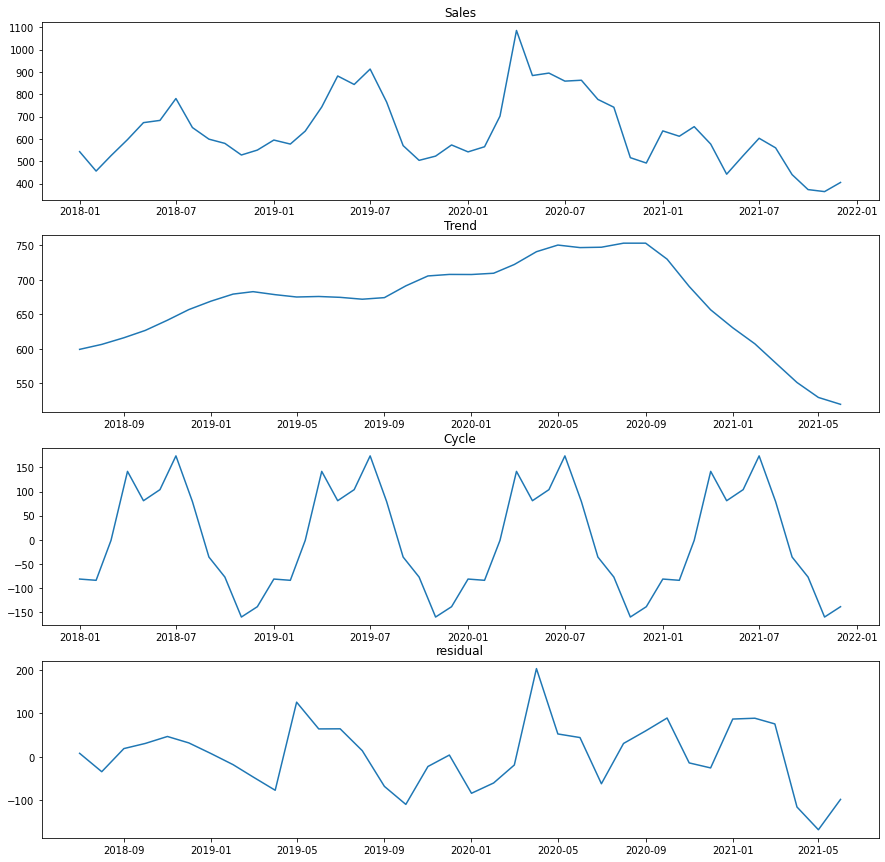

In [56]:
import statsmodels.api as sm

df = data
df.set_index(['tanggal'],inplace=True)

res = sm.tsa.seasonal_decompose(df)


fig, ax = plt.subplots(4,1,figsize=(15, 15))
ax[0].plot(res.observed)
ax[0].set_title('Sales')
ax[1].plot(res.trend)
ax[1].set_title('Trend')
ax[2].plot(res.seasonal)
ax[2].set_title('Cycle')
ax[3].plot(res.resid)
ax[3].set_title('residual')
plt.show()

Kesimpulan : Data memiliki trend

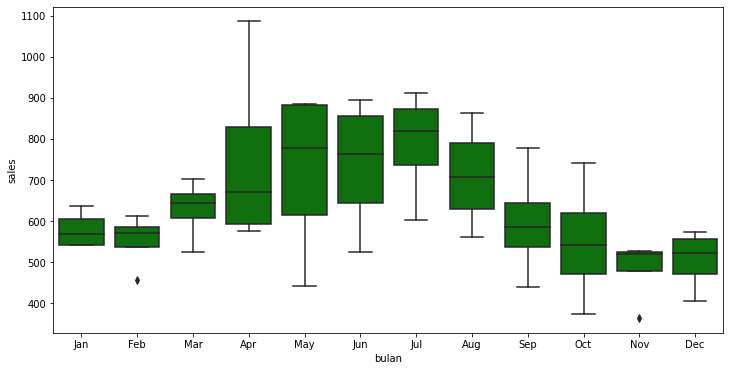

In [57]:
import calendar

df2 = pd.read_excel('/content/data penjualan indihome.xlsx')
df2['bulan'] = pd.to_datetime(df2['tanggal']).dt.month
df2['bulan'] = df2['bulan'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12,6))
sns.boxplot(x='bulan', y='sales', data=df2, color = 'g')
plt.show()

Data 3 tahun (2018-2021) menggambarkan penjualan meningkat di pertengahan tahun

`Check Stasioner Data`

In [58]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['sales'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.199641484070618
2. P-Value :  0.20637560318811876
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064



    p-value > 0.05 - Data termasuk non-stationer.
    p-value <=0.05 - Data termasuk stationer.

Kesimpulan : Data tidak stasioner

#Moving Average

In [59]:
data_SMA = data
data_DMA = data

`single moving average`

In [60]:
periode = [2,3,4,5] 

for i in periode:
  data_SMA['{}_MA_single'.format(i)]= data['sales'].rolling(window=i).mean()

data_SMA

,sales,2_MA_single,3_MA_single,4_MA_single,5_MA_single
tanggal,,,,,
2018-01-01,543,NaN,NaN,NaN,NaN
2018-02-01,456,499.5,NaN,NaN,NaN
2018-03-01,525,490.5,508.000000,NaN,NaN
2018-04-01,597,561.0,526.000000,530.25,NaN
2018-05-01,673,635.0,598.333333,562.75,558.8
2018-06-01,683,678.0,651.000000,619.50,586.8
2018-07-01,781,732.0,712.333333,683.50,651.8
2018-08-01,651,716.0,705.000000,697.00,677.0
2018-09-01,599,625.0,677.000000,678.50,677.4


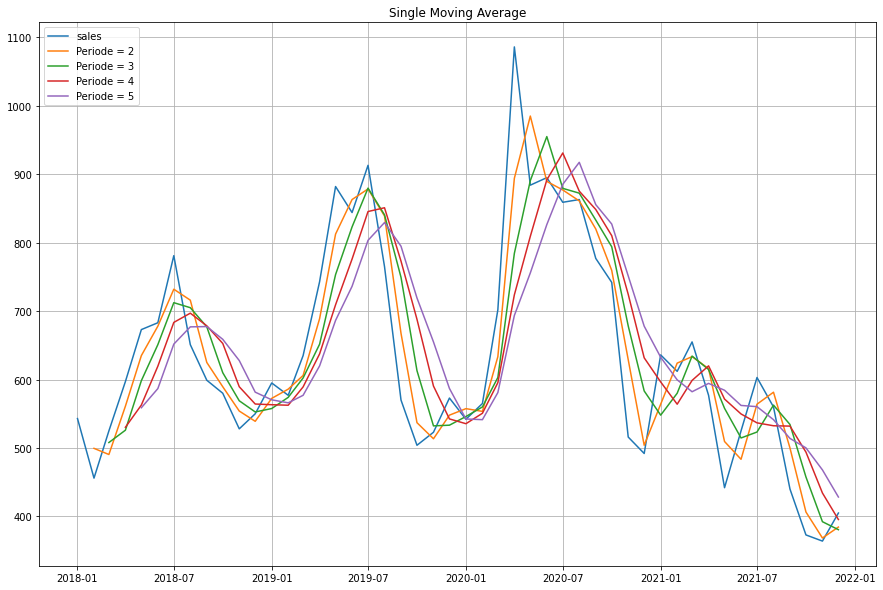

In [61]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(data_SMA['sales'],label='sales')
plt.plot(data_SMA['2_MA_single'],label='Periode = 2')
plt.plot(data_SMA['3_MA_single'],label='Periode = 3')
plt.plot(data_SMA['4_MA_single'],label='Periode = 4')
plt.plot(data_SMA['5_MA_single'],label='Periode = 5')
plt.title('Single Moving Average')
plt.legend(loc=2)

`double moving average`

In [62]:
periode = [2,3,4,5] 

for i in periode:
  single_ma = data['sales'].rolling(window=i).mean()
  data_DMA['{}_MA_double'.format(i)]= single_ma.rolling(window=i).mean()

data_DMA.drop(['2_MA_single','3_MA_single','4_MA_single','5_MA_single'],axis=1,inplace=True)
data_DMA

,sales,2_MA_double,3_MA_double,4_MA_double,5_MA_double
tanggal,,,,,
2018-01-01,543,NaN,NaN,NaN,NaN
2018-02-01,456,NaN,NaN,NaN,NaN
2018-03-01,525,495.00,NaN,NaN,NaN
2018-04-01,597,525.75,NaN,NaN,NaN
2018-05-01,673,598.00,544.111111,NaN,NaN
2018-06-01,683,656.50,591.777778,NaN,NaN
2018-07-01,781,705.00,653.888889,599.0000,NaN
2018-08-01,651,724.00,689.444444,640.6875,NaN
2018-09-01,599,670.50,698.111111,669.6250,630.36


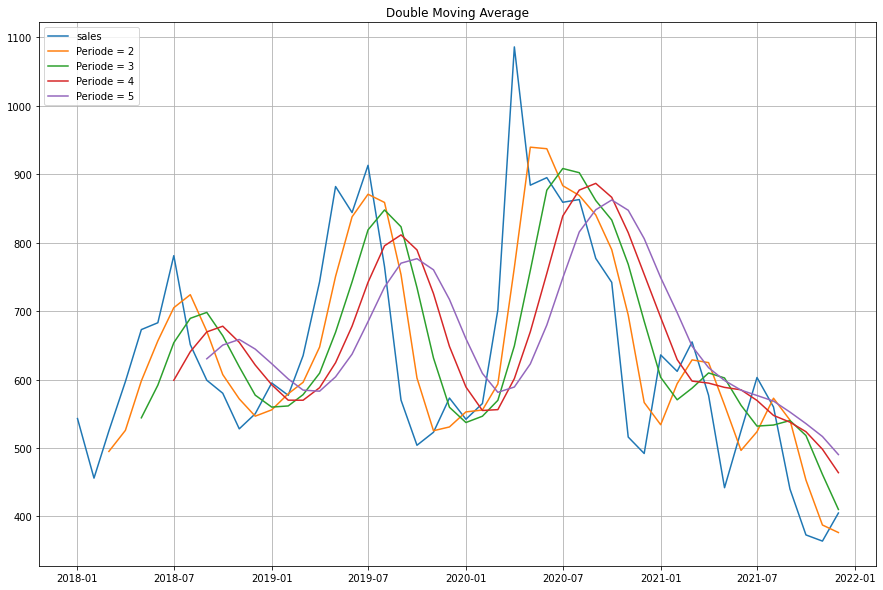

In [63]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(data_DMA['sales'],label='sales')
plt.plot(data_DMA['2_MA_double'],label='Periode = 2')
plt.plot(data_DMA['3_MA_double'],label='Periode = 3')
plt.plot(data_DMA['4_MA_double'],label='Periode = 4')
plt.plot(data_DMA['5_MA_double'],label='Periode = 5')
plt.title('Double Moving Average')
plt.legend(loc=2)

`evaluasi model double moving average`

In [64]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [65]:
periode = [2,3,4,5] 
mape_ma = []

for i in periode:
  df = data_DMA[['sales','{}_MA_double'.format(i)]]
  df = df.dropna()
  mape_ma.append(mape(df.iloc[:,0],df.iloc[:,1]))

evaluasi_DMA = pd.DataFrame(list(zip(periode, mape_ma)),columns =['Periode', 'MAPE double moving average'])
evaluasi_DMA


,Periode,MAPE double moving average
0,2,10.044512
1,3,15.739918
2,4,18.975762
3,5,22.118415


kesimpulan : double moving average dengan periode = 2 memiliki mape paling kecil sebesar 10.044512

#Exponential Smoothing

`double exponential smoothing`

In [66]:
from statsmodels.tsa.api import Holt

a = []
b = []
MAPE = []

for alpha in np.arange(0.01,1.01,0.01):
  for beta in np.arange(0.01,1.01,0.01):
    a.append(alpha)
    b.append(beta)
    model_DES = Holt(data['sales']).fit(smoothing_level=alpha,smoothing_slope=beta,optimized=False,use_brute=True)
    pred = model_DES.fittedvalues
    MAPE.append(mape(data['sales'], pred))

double_ETS = pd.DataFrame(list(zip(a, b, MAPE)),columns =['alpha', 'beta', 'MAPE'])
double_ETS

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be u

,alpha,beta,MAPE
0,0.01,0.01,314.752378
1,0.01,0.02,307.769935
2,0.01,0.03,300.904509
3,0.01,0.04,294.154562
4,0.01,0.05,287.518569
...,...,...,...
9995,1.00,0.96,16.414594
9996,1.00,0.97,16.448262
9997,1.00,0.98,16.486283
9998,1.00,0.99,16.534441


In [67]:
#urutan terkecil MAPE 
double_ETS.sort_values(by=['MAPE'], ascending=True).head()

,alpha,beta,MAPE
9907,1.0,0.08,13.395173
9908,1.0,0.09,13.398318
9906,1.0,0.07,13.404688
9909,1.0,0.10,13.411423
9905,1.0,0.06,13.421862


`plot model double exponential smoothing`

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Kurva Prediksi Visitor datang | MAPE = 13.395173444231737')

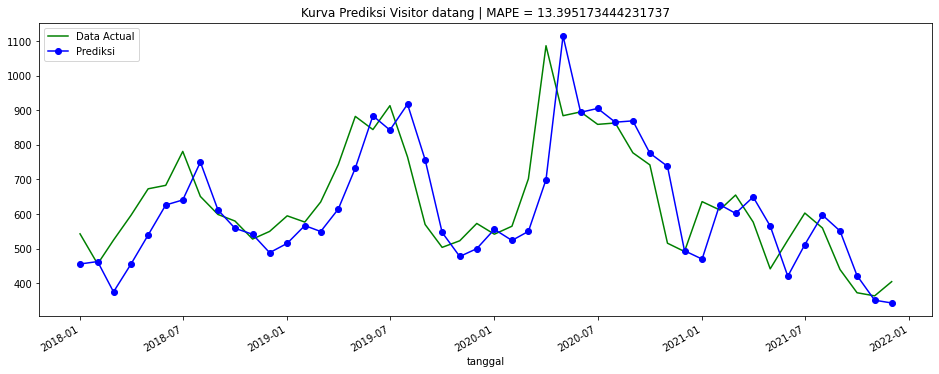

In [68]:
model_DES = Holt(data['sales']).fit(smoothing_level=1, smoothing_slope=0.08, optimized=False, use_brute=True)
evaluasi_model = mape(data['sales'], model_DES.fittedvalues)

plt.figure(figsize=(16,6))
plt.plot(data.index, data['sales'], color='g', label='Data Actual')
model_DES.fittedvalues.plot(marker="o", color='b', label ='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Visitor datang | MAPE = {}".format(evaluasi_model))

kesimpulan : double exponential smoothing dengan parameter alpha = 1.0 dan beta = 0.08 memiliki mape paling kecil sebesar 13.395173444

#Forecasting

##`double exponential smoothing`

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 0, '')

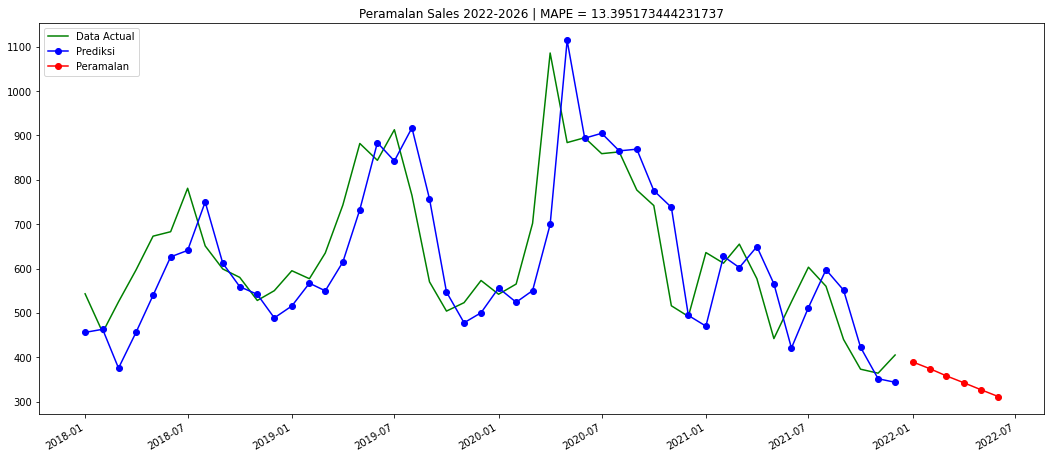

In [69]:
data = pd.read_excel('/content/data penjualan indihome.xlsx')
data.set_index(['tanggal'],inplace=True)

model_DES = Holt(data['sales']).fit(smoothing_level=1, smoothing_slope=0.08, optimized=False, use_brute=True)
test_pred = model_DES.forecast(6).rename('Peramalan') #data.shape[0]

plt.figure(figsize=(18,8))
plt.plot(data.index, data['sales'], color='g', label='Data Actual')
model_DES.fittedvalues.plot(marker="o", color='b', label ='Prediksi')
test_pred.plot(color='red', marker="o", legend=True)
plt.legend(loc="upper left")
plt.title("Peramalan Sales 2022-2026 | MAPE = {}".format(evaluasi_model))
plt.xlabel('')

In [70]:
test_pred

2022-01-01    389.392623
2022-02-01    373.785246
2022-03-01    358.177868
2022-04-01    342.570491
2022-05-01    326.963114
2022-06-01    311.355737
Freq: MS, Name: Peramalan, dtype: float64

In [71]:
model_DES

##`double moving average`

In [72]:
def forecast_dma(df, periode, time):
  for i in np.arange(1,time,1):
    single_ma = df.rolling(window=periode).mean()
    double_ma = single_ma.rolling(window=periode).mean()

    a = (2*single_ma.tail(1).values)-(double_ma.tail(1).values)
    b = (2/(periode-1)) * ((single_ma.tail(1).values)-(double_ma.tail(1).values))

    f = pd.Series(a+(b*i))
    df = df.append(f)

    print("a untuk prediksi ke-{} = {}".format(i,a))
    print("b untuk prediksi ke-{} = {}".format(i,b))
  return df

df = forecast_dma(data['sales'],2,7) #Prediksi 6 bulan ke depan
df = pd.DataFrame(df)
df[0] = df[0].apply(lambda x: '%.9f' % x)
df = df.tail(6)
df.set_index(test_pred.index,inplace=True)
df

a untuk prediksi ke-1 = [392.5]
b untuk prediksi ke-1 = [16.]
a untuk prediksi ke-2 = [417.875]
b untuk prediksi ke-2 = [22.25]
a untuk prediksi ke-3 = [449.78125]
b untuk prediksi ke-3 = [28.6875]
a untuk prediksi ke-4 = [530.9453125]
b untuk prediksi ke-4 = [63.671875]
a untuk prediksi ke-5 = [741.55273438]
b untuk prediksi ke-5 = [161.62890625]
a untuk prediksi ke-6 = [1421.12841797]
b untuk prediksi ke-6 = [506.92675781]


,0
2022-01-01,408.500000000
2022-02-01,462.375000000
2022-03-01,535.843750000
2022-04-01,785.632812500
2022-05-01,1549.697265625
2022-06-01,4462.688964844


Text(0.5, 0, '')

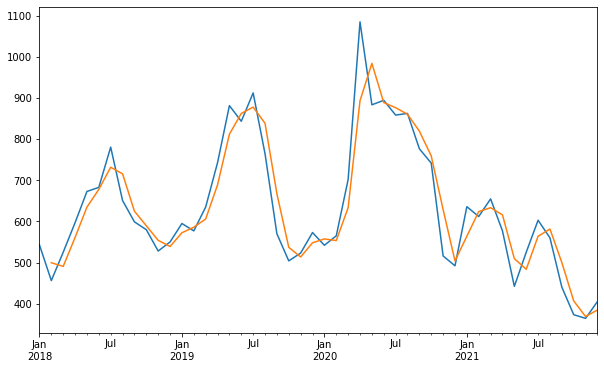

In [73]:
#Plot Data Awal
data['sales'].plot(figsize=(10,6))
data['sales'].rolling(window =2).mean().plot()
plt.xlabel('')

Text(0.5, 0, '')

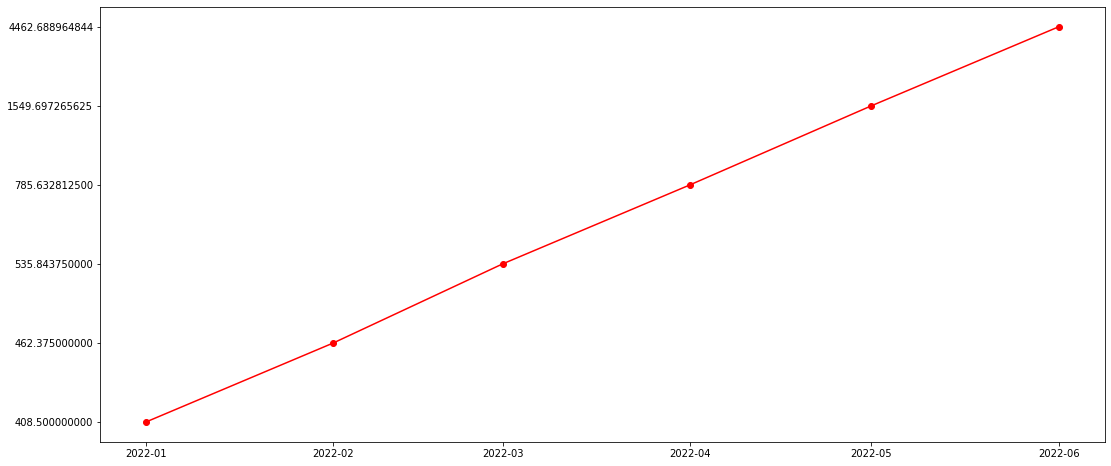

In [74]:
#Plot Data Prediksi
plt.figure(figsize=(18,8))
plt.plot(df.index, df[0], color='red', marker="o")
plt.xlabel('')

KESIMPULAN:

* Double Moving Average memiliki MAPE [10.044512] lebih kecil dibanding Double Eksponensial Smoothing [13.395173444]
* Double Moving Average tidak optimal untuk peramalan jangka panjang
* Double Eksponensial Smoothing lebih optimal untuk peramalan jangka panjang

---

`Prediksi Double Moving Average` terjadi peningkatan tingkat penjualan untuk 6 bulan ke depan

`Prediksi Double Eksponensial Smoothing` terjadi penurunan tingkat penjualan untuk 6 bulan ke depan